In [6]:
#import library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
pd.set_option('display.max_columns', None) # show all columns
# pd.set_option('display.max_rows', None) # show all rows

In [8]:
#read csv file

df = pd.read_csv('data/owid-covid-data.csv')

# Step 1: Remove duplicate or irrelevant observations

In [9]:
df.isna().sum()

iso_code                                        0
continent                                    9995
location                                        0
date                                            0
total_cases                                  3040
                                            ...  
human_development_index                     30197
excess_mortality_cumulative_absolute       161270
excess_mortality_cumulative                161270
excess_mortality                           161270
excess_mortality_cumulative_per_million    161270
Length: 67, dtype: int64

In [10]:
## drop columns that has null more than 150000
df.drop(df.columns[df.isna().sum()> 150000], axis = 1, inplace = True)

In [11]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',

In [12]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,1.639770e+05,1.638430e+05,1.618580e+05,1.461080e+05,146151.000000,144050.000000,163216.000000,163082.000000,161103.000000,145360.000000,145403.000000,143308.000000,126199.000000,23538.000000,23538.000000,24684.000000,24684.000000,6.758700e+04,6.953600e+04,69536.000000,67587.000000,8.436500e+04,84365.000000,78973.000000,78394.000000,4.556000e+04,4.332100e+04,4.059300e+04,1.782000e+04,3.771900e+04,8.540100e+04,45560.000000,43321.000000,40593.000000,17820.000000,85401.000000,8.407900e+04,84079.000000,130959.000000,1.659390e+05,148540.000000,138401.000000,136901.000000,137659.000000,139077.000000,91590.000000,137345.000000,144546.000000,106488.000000,105027.000000,68854.000000,124174.000000,155913.000000,136820.000000
mean,2.560297e+06,1.164153e+04,1.164055e+04,5.791914e+04,170.941143,172.546963,29825.981701,168.196259,167.033507,512.154301,1.686368,1.686839,0.999941,902.782352,23.947322,4193.309350,167.218384,6.833727e+04,1.745877e+07,745.584433,3.227168,6.108206e+04,2.913341,0.097872,198.390443,1.734137e+08,8.874181e+07,7.004719e+07,1.964212e+07,1.167313e+06,5.198079e+05,73.387224,38.049239,32.700467,12.565946,3297.318778,2.142687e+05,0.148757,54.499280,1.473961e+08,464.256373,30.566758,8.762152,5.534009,19642.207419,13.581206,260.227222,8.211348,10.626991,32.778648,50.786567,3.027706,73.575944,0.725574
std,1.560856e+07,8.477591e+04,8.294513e+04,3.034096e+05,831.419443,816.374300,52749.291587,713.462096,537.503867,787.876999,5.150768,3.619836,0.368448,2677.742352,28.046580,11650.073067,209.335025,2.160574e+05,6.454048e+07,1802.797405,8.928600,1.936986e+05,7.499338,0.111083,4203.557645,7.829246e+08,4.017363e+08,3.319650e+08,9.318071e+07,4.359996e+06,2.801617e+06,64.767648,28.946609,27.772723,17.407772,3900.621494,1.181535e+06,0.245593,20.455528,7.053961e+08,2143.950229,9.102095,6.146170,4.186023,20645.814721,20.022162,119.864451,4.495628,10.557987,13.524077,31.811432,2.449998,7.491446,0.149962
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,2.023000e+03,1.000000e+00,7.000000e+00,7.975000e+01,0.000000,0.143000,627.713000,0.041000,1.630000,18.658000,0.000000,0.018000,0.810000,28.000000,3.929000,129.000000,26.448250,2.481000e+03,3.756105e+05,34.990250,0.256000,2.155000e+03,0.231000,0.018600,7.200000,6.074185e+05,3.941760e+05,2.781310e+05,2.440750e+03,6.285000e+03,1.053000e+03,12.335000,8.750000,5.200000,0.010000,680.000000,4.

In [13]:
df.drop(['total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed_per_thousand','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred','new_vaccinations_smoothed_per_million'],axis=1,inplace=True)

In [14]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,new_tests_smoothed,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [15]:
#Drop other in fomation because this is rate of death of another disease.
df.drop(['cardiovasc_death_rate','diabetes_prevalence','extreme_poverty'],axis=1,inplace=True)

In [16]:
df.drop(['aged_65_older','aged_70_older','gdp_per_capita'],axis=1,inplace=True)

In [17]:
df.drop(['life_expectancy'],axis=1,inplace=True)

In [18]:
rate_of_infect = df

In [19]:
rate_of_infect = rate_of_infect[["continent","location","date","population","total_cases","total_deaths","icu_patients","total_tests","positive_rate","total_vaccinations"]]

In [20]:
continent_infect = rate_of_infect[["continent","location","date","population","total_cases","total_deaths","total_tests","positive_rate","total_vaccinations"]]

In [21]:
continent_infect

,continent,location,date,population,total_cases,total_deaths,total_tests,positive_rate,total_vaccinations
0,Asia,Afghanistan,2020-02-24,39835428.0,5.0,NaN,NaN,NaN,NaN
1,Asia,Afghanistan,2020-02-25,39835428.0,5.0,NaN,NaN,NaN,NaN
2,Asia,Afghanistan,2020-02-26,39835428.0,5.0,NaN,NaN,NaN,NaN
3,Asia,Afghanistan,2020-02-27,39835428.0,5.0,NaN,NaN,NaN,NaN
4,Asia,Afghanistan,2020-02-28,39835428.0,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
167012,Africa,Zimbabwe,2022-03-04,15092171.0,238739.0,5397.0,2090217.0,0.1153,7930621.0
167013,Africa,Zimbabwe,2022-03-05,15092171.0,239019.0,5397.0,NaN,0.0979,7936145.0
167014,Africa,Zimbabwe,2022-03-06,15092171.0,239209.0,5399.0,2102446.0,0.1308,7938362.0
167015,Africa,Zimbabwe,2022-03-07,15092171.0,239710.0,5399.0,NaN,NaN,7943325.0


In [22]:
continent_infect['continent'].value_counts()

Africa           39582
Europe           37242
Asia             36344
North America    25033
South America     9556
Oceania           9265
Name: continent, dtype: int64

In [23]:
continent_infect[["continent","location","date","population","total_cases","total_deaths","total_tests","positive_rate","total_vaccinations"]]

,continent,location,date,population,total_cases,total_deaths,total_tests,positive_rate,total_vaccinations
0,Asia,Afghanistan,2020-02-24,39835428.0,5.0,NaN,NaN,NaN,NaN
1,Asia,Afghanistan,2020-02-25,39835428.0,5.0,NaN,NaN,NaN,NaN
2,Asia,Afghanistan,2020-02-26,39835428.0,5.0,NaN,NaN,NaN,NaN
3,Asia,Afghanistan,2020-02-27,39835428.0,5.0,NaN,NaN,NaN,NaN
4,Asia,Afghanistan,2020-02-28,39835428.0,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
167012,Africa,Zimbabwe,2022-03-04,15092171.0,238739.0,5397.0,2090217.0,0.1153,7930621.0
167013,Africa,Zimbabwe,2022-03-05,15092171.0,239019.0,5397.0,NaN,0.0979,7936145.0
167014,Africa,Zimbabwe,2022-03-06,15092171.0,239209.0,5399.0,2102446.0,0.1308,7938362.0
167015,Africa,Zimbabwe,2022-03-07,15092171.0,239710.0,5399.0,NaN,NaN,7943325.0


In [24]:
continent_infect

,continent,location,date,population,total_cases,total_deaths,total_tests,positive_rate,total_vaccinations
0,Asia,Afghanistan,2020-02-24,39835428.0,5.0,NaN,NaN,NaN,NaN
1,Asia,Afghanistan,2020-02-25,39835428.0,5.0,NaN,NaN,NaN,NaN
2,Asia,Afghanistan,2020-02-26,39835428.0,5.0,NaN,NaN,NaN,NaN
3,Asia,Afghanistan,2020-02-27,39835428.0,5.0,NaN,NaN,NaN,NaN
4,Asia,Afghanistan,2020-02-28,39835428.0,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
167012,Africa,Zimbabwe,2022-03-04,15092171.0,238739.0,5397.0,2090217.0,0.1153,7930621.0
167013,Africa,Zimbabwe,2022-03-05,15092171.0,239019.0,5397.0,NaN,0.0979,7936145.0
167014,Africa,Zimbabwe,2022-03-06,15092171.0,239209.0,5399.0,2102446.0,0.1308,7938362.0
167015,Africa,Zimbabwe,2022-03-07,15092171.0,239710.0,5399.0,NaN,NaN,7943325.0


In [25]:
continent_infect.isna().sum()

continent               9995
location                   0
date                       0
population              1078
total_cases             3040
total_deaths           20909
total_tests            97481
positive_rate          88044
total_vaccinations    121457
dtype: int64

In [26]:
continent_infect = continent_infect[continent_infect['continent'].notnull()]

In [27]:
continent_infect[continent_infect['positive_rate'].isna()]

,continent,location,date,population,total_cases,total_deaths,total_tests,positive_rate,total_vaccinations
0,Asia,Afghanistan,2020-02-24,39835428.0,5.0,NaN,NaN,NaN,NaN
1,Asia,Afghanistan,2020-02-25,39835428.0,5.0,NaN,NaN,NaN,NaN
2,Asia,Afghanistan,2020-02-26,39835428.0,5.0,NaN,NaN,NaN,NaN
3,Asia,Afghanistan,2020-02-27,39835428.0,5.0,NaN,NaN,NaN,NaN
4,Asia,Afghanistan,2020-02-28,39835428.0,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
166349,Africa,Zimbabwe,2020-05-10,15092171.0,36.0,4.0,9872.0,NaN,NaN
166350,Africa,Zimbabwe,2020-05-11,15092171.0,36.0,4.0,10598.0,NaN,NaN
166351,Africa,Zimbabwe,2020-05-12,15092171.0,36.0,4.0,11058.0,NaN,NaN
167015,Africa,Zimbabwe,2022-03-07,15092171.0,239710.0,5399.0,NaN,NaN,7943325.0


In [28]:
continent_infect[continent_infect['total_cases'].isna()]

,continent,location,date,population,total_cases,total_deaths,total_tests,positive_rate,total_vaccinations
1499,Europe,Albania,2020-02-25,2872934.0,NaN,NaN,8.0,NaN,NaN
1500,Europe,Albania,2020-02-26,2872934.0,NaN,NaN,13.0,NaN,NaN
1501,Europe,Albania,2020-02-27,2872934.0,NaN,NaN,17.0,NaN,NaN
1502,Europe,Albania,2020-02-28,2872934.0,NaN,NaN,18.0,NaN,NaN
1503,Europe,Albania,2020-02-29,2872934.0,NaN,NaN,26.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
154877,Oceania,Tuvalu,2021-10-18,11925.0,NaN,NaN,NaN,NaN,NaN
154878,Oceania,Tuvalu,2021-10-19,11925.0,NaN,NaN,NaN,NaN,NaN
154879,Oceania,Tuvalu,2021-10-20,11925.0,NaN,NaN,NaN,NaN,NaN
154880,Oceania,Tuvalu,2021-10-21,11925.0,NaN,NaN,NaN,NaN,NaN


In [29]:
continent_infect[continent_infect['location'] == 'Albania']

,continent,location,date,population,total_cases,total_deaths,total_tests,positive_rate,total_vaccinations
1499,Europe,Albania,2020-02-25,2872934.0,NaN,NaN,8.0,NaN,NaN
1500,Europe,Albania,2020-02-26,2872934.0,NaN,NaN,13.0,NaN,NaN
1501,Europe,Albania,2020-02-27,2872934.0,NaN,NaN,17.0,NaN,NaN
1502,Europe,Albania,2020-02-28,2872934.0,NaN,NaN,18.0,NaN,NaN
1503,Europe,Albania,2020-02-29,2872934.0,NaN,NaN,26.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2237,Europe,Albania,2022-03-04,2872934.0,272030.0,3478.0,NaN,0.3944,NaN
2238,Europe,Albania,2022-03-05,2872934.0,272030.0,3478.0,NaN,0.3577,NaN
2239,Europe,Albania,2022-03-06,2872934.0,272210.0,3482.0,1591442.0,0.2515,NaN
2240,Europe,Albania,2022-03-07,2872934.0,272250.0,3483.0,NaN,NaN,2723146.0


In [30]:
continent_infect = continent_infect.fillna({'population': 'Unknown', 'total_cases': 0, 'total_deaths':0, 'total_tests':0, 'positive_rate': 0, 'total_vaccinations': 'Unknown'})


In [31]:
continent_infect.isna().sum()

continent             0
location              0
date                  0
population            0
total_cases           0
total_deaths          0
total_tests           0
positive_rate         0
total_vaccinations    0
dtype: int64

In [32]:
africa_infect = continent_infect[continent_infect['continent'] == 'Africa']
europe_infect = continent_infect[continent_infect['continent'] == 'Europe']
asia_infect = continent_infect[continent_infect['continent'] == 'Asia']
north_america_infect = continent_infect[continent_infect['continent'] == 'North America']
south_america_infect = continent_infect[continent_infect['continent'] == 'South America']
oceania_america_infect = continent_infect[continent_infect['continent'] == 'Oceania']

In [33]:
africa_infect

,continent,location,date,population,total_cases,total_deaths,total_tests,positive_rate,total_vaccinations
2242,Africa,Algeria,2020-02-25,44616626.0,1.0,0.0,0.0,0.0000,Unknown
2243,Africa,Algeria,2020-02-26,44616626.0,1.0,0.0,0.0,0.0000,Unknown
2244,Africa,Algeria,2020-02-27,44616626.0,1.0,0.0,0.0,0.0000,Unknown
2245,Africa,Algeria,2020-02-28,44616626.0,1.0,0.0,0.0,0.0000,Unknown
2246,Africa,Algeria,2020-02-29,44616626.0,1.0,0.0,0.0,0.0000,Unknown
...,...,...,...,...,...,...,...,...,...
167012,Africa,Zimbabwe,2022-03-04,15092171.0,238739.0,5397.0,2090217.0,0.1153,7930621.0
167013,Africa,Zimbabwe,2022-03-05,15092171.0,239019.0,5397.0,0.0,0.0979,7936145.0
167014,Africa,Zimbabwe,2022-03-06,15092171.0,239209.0,5399.0,2102446.0,0.1308,7938362.0
167015,Africa,Zimbabwe,2022-03-07,15092171.0,239710.0,5399.0,0.0,0.0000,7943325.0


In [34]:
europe_infect

,continent,location,date,population,total_cases,total_deaths,total_tests,positive_rate,total_vaccinations
1499,Europe,Albania,2020-02-25,2872934.0,0.0,0.0,8.0,0.0,Unknown
1500,Europe,Albania,2020-02-26,2872934.0,0.0,0.0,13.0,0.0,Unknown
1501,Europe,Albania,2020-02-27,2872934.0,0.0,0.0,17.0,0.0,Unknown
1502,Europe,Albania,2020-02-28,2872934.0,0.0,0.0,18.0,0.0,Unknown
1503,Europe,Albania,2020-02-29,2872934.0,0.0,0.0,26.0,0.0,Unknown
...,...,...,...,...,...,...,...,...,...
162090,Europe,Vatican,2022-03-04,812.0,29.0,0.0,0.0,0.0,Unknown
162091,Europe,Vatican,2022-03-05,812.0,29.0,0.0,0.0,0.0,Unknown
162092,Europe,Vatican,2022-03-06,812.0,29.0,0.0,0.0,0.0,Unknown
162093,Europe,Vatican,2022-03-07,812.0,29.0,0.0,0.0,0.0,Unknown


In [35]:
asia_infect

,continent,location,date,population,total_cases,total_deaths,total_tests,positive_rate,total_vaccinations
0,Asia,Afghanistan,2020-02-24,39835428.0,5.0,0.0,0.0,0.0,Unknown
1,Asia,Afghanistan,2020-02-25,39835428.0,5.0,0.0,0.0,0.0,Unknown
2,Asia,Afghanistan,2020-02-26,39835428.0,5.0,0.0,0.0,0.0,Unknown
3,Asia,Afghanistan,2020-02-27,39835428.0,5.0,0.0,0.0,0.0,Unknown
4,Asia,Afghanistan,2020-02-28,39835428.0,5.0,0.0,0.0,0.0,Unknown
...,...,...,...,...,...,...,...,...,...
165572,Asia,Yemen,2022-03-04,30490639.0,11774.0,2135.0,0.0,0.0,Unknown
165573,Asia,Yemen,2022-03-05,30490639.0,11775.0,2135.0,0.0,0.0,Unknown
165574,Asia,Yemen,2022-03-06,30490639.0,11777.0,2138.0,0.0,0.0,784792.0
165575,Asia,Yemen,2022-03-07,30490639.0,11781.0,2138.0,0.0,0.0,Unknown


In [36]:
north_america_infect

,continent,location,date,population,total_cases,total_deaths,total_tests,positive_rate,total_vaccinations
4441,North America,Anguilla,2020-03-28,15125.0,2.0,0.0,0.0,0.0,Unknown
4442,North America,Anguilla,2020-03-29,15125.0,2.0,0.0,0.0,0.0,Unknown
4443,North America,Anguilla,2020-03-30,15125.0,2.0,0.0,0.0,0.0,Unknown
4444,North America,Anguilla,2020-03-31,15125.0,2.0,0.0,0.0,0.0,Unknown
4445,North America,Anguilla,2020-04-01,15125.0,2.0,0.0,0.0,0.0,Unknown
...,...,...,...,...,...,...,...,...,...
158646,North America,United States,2022-03-04,332915074.0,79250729.0,958148.0,0.0,0.0,555380489.0
158647,North America,United States,2022-03-05,332915074.0,79266021.0,958441.0,0.0,0.0,555534049.0
158648,North America,United States,2022-03-06,332915074.0,79271686.0,958625.0,0.0,0.0,555578962.0
158649,North America,United States,2022-03-07,332915074.0,79339202.0,960311.0,0.0,0.0,555595418.0


In [37]:
south_america_infect

,continent,location,date,population,total_cases,total_deaths,total_tests,positive_rate,total_vaccinations
5878,South America,Argentina,2020-01-01,45605823.0,0.0,0.0,4.0,0.0,Unknown
5879,South America,Argentina,2020-01-02,45605823.0,0.0,0.0,99.0,0.0,Unknown
5880,South America,Argentina,2020-01-03,45605823.0,0.0,0.0,104.0,0.0,Unknown
5881,South America,Argentina,2020-01-04,45605823.0,0.0,0.0,180.0,0.0,Unknown
5882,South America,Argentina,2020-01-05,45605823.0,0.0,0.0,194.0,0.0,Unknown
...,...,...,...,...,...,...,...,...,...
162815,South America,Venezuela,2022-03-04,28704947.0,516236.0,5645.0,0.0,0.0,Unknown
162816,South America,Venezuela,2022-03-05,28704947.0,516578.0,5647.0,0.0,0.0,Unknown
162817,South America,Venezuela,2022-03-06,28704947.0,516817.0,5649.0,0.0,0.0,Unknown
162818,South America,Venezuela,2022-03-07,28704947.0,516817.0,5649.0,0.0,0.0,Unknown


In [38]:
oceania_america_infect

,continent,location,date,population,total_cases,total_deaths,total_tests,positive_rate,total_vaccinations
8944,Oceania,Australia,2020-01-26,25788217.0,4.0,0.0,0.0,0.0,Unknown
8945,Oceania,Australia,2020-01-27,25788217.0,5.0,0.0,0.0,0.0,Unknown
8946,Oceania,Australia,2020-01-28,25788217.0,5.0,0.0,0.0,0.0,Unknown
8947,Oceania,Australia,2020-01-29,25788217.0,6.0,0.0,0.0,0.0,Unknown
8948,Oceania,Australia,2020-01-30,25788217.0,9.0,0.0,0.0,0.0,Unknown
...,...,...,...,...,...,...,...,...,...
164097,Oceania,Wallis and Futuna,2022-03-04,11094.0,454.0,7.0,0.0,0.0,Unknown
164098,Oceania,Wallis and Futuna,2022-03-05,11094.0,454.0,7.0,0.0,0.0,Unknown
164099,Oceania,Wallis and Futuna,2022-03-06,11094.0,454.0,7.0,0.0,0.0,Unknown
164100,Oceania,Wallis and Futuna,2022-03-07,11094.0,454.0,7.0,0.0,0.0,Unknown


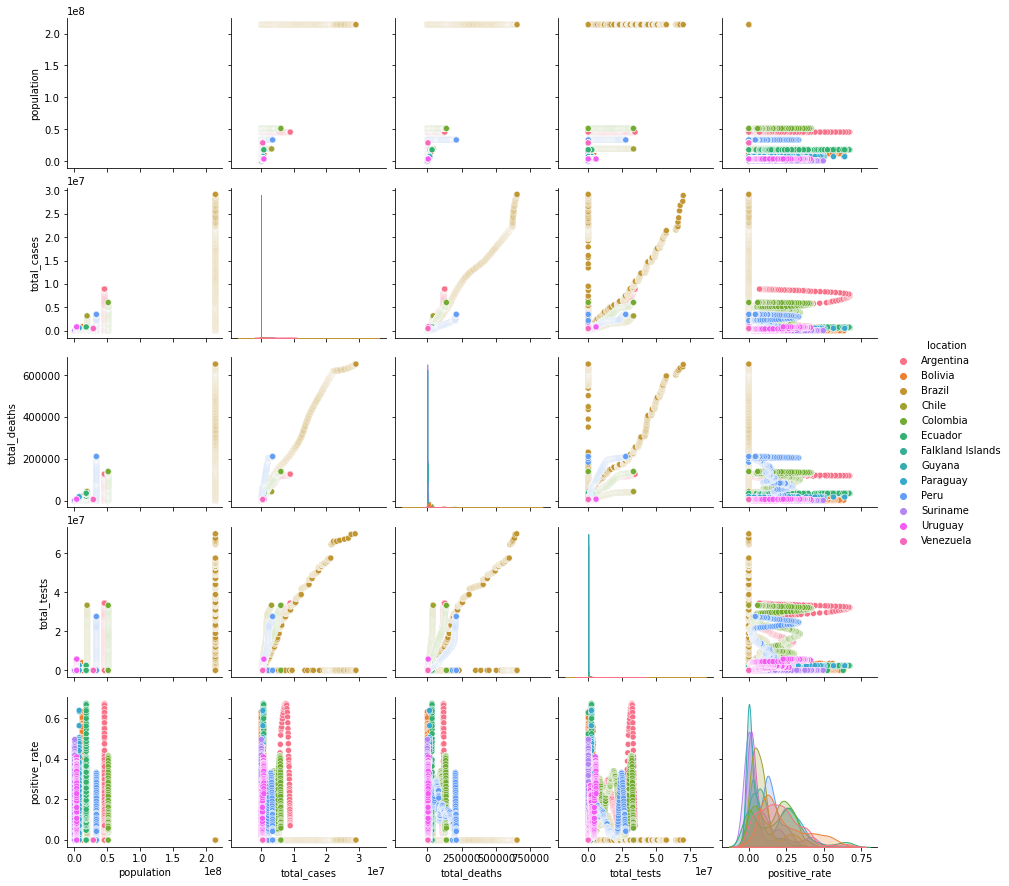

In [39]:
sns.pairplot(south_america_infect, hue="location")

In [40]:
sns.countplot(x = fire_size['SIZE'],hue = fire_size['STATUS'])

NameError: name 'fire_size' is not defined